1. Linear Least Squares Regression

In [1]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

442 10
(442,)


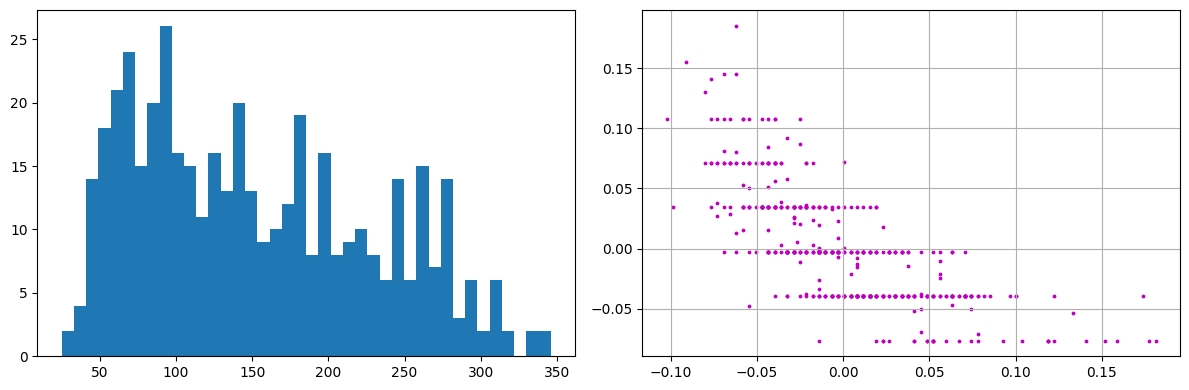

In [2]:
# Load data, inspect and do exploratory plots

diabetes = datasets.load_diabetes()

X = diabetes.data
t = diabetes.target

# Inspect sizes

NumData, NumFeatures = X.shape
print(NumData, NumFeatures)   # 442 x 10
print(t.shape)                # 442

# Plot and save

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
ax[0].hist(t, bins=40)
ax[1].scatter(X[:,6], X[:,7], c='m', s=3)
ax[1].grid(True)
plt.tight_layout()
plt.savefig("DiabetesTargetAndTwoInputs.jpg")

Comparing pseudo-inverse solution to sklearn output

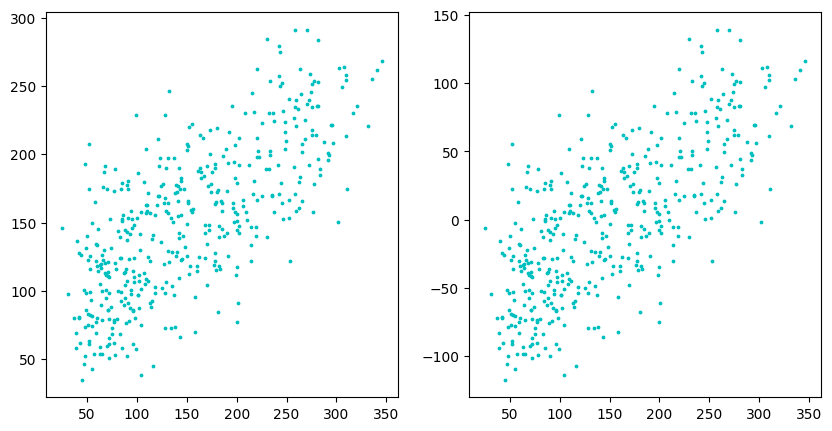

In [3]:
import numpy as np

# Linear regression using sklearn

lin = LinearRegression()
lin.fit(X, t)
th1 = lin.predict(X)

# Pseudo-inverse solution to linear regression

w = np.linalg.inv(X.T @ X) @ X.T @ t
th2 = X @ w

# Plot predictions to check if they look the same!

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].scatter(t, th1, c='c', s=3)
ax[1].scatter(t, th2, c='c', s=3)

2 Regularization

In [4]:
# Tikhanov (quadratic) Regularizer

gamma = 0.5
wR = np.linalg.inv(X.T @ X + gamma*np.identity(NumFeatures)) @ X.T @ t

# fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
# ax[0].bar(np.arange(len(w)),w)
# ax[1].bar(np.arange(len(w)),wR)


plt.savefig("LeastSquareAndRegularizedWeights.jpg")


<Figure size 640x480 with 0 Axes>

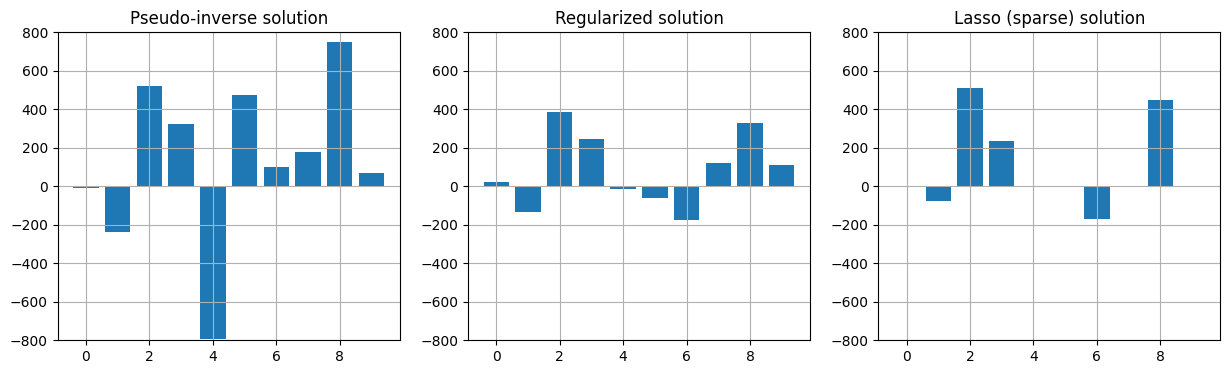

In [5]:
# Sparsity inducing (lasso) regularizer

from sklearn.linear_model import Lasso
ll = Lasso(alpha=0.2)
ll.fit(X, t)
th_lasso = ll.predict(X)

wL = np.linalg.inv(X.T @ X + gamma*np.identity(NumFeatures)) @ X.T @ th_lasso

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,4))
ax[0].bar(np.arange(len(w)), w)
ax[1].bar(np.arange(len(wR)), wR)
ax[2].bar(np.arange(len(ll.coef_)), ll.coef_)
ax[0].set_ylim(-800, 800)
ax[1].set_ylim(-800, 800)
ax[2].set_ylim(-800, 800)
ax[0].set_title("Pseudo-inverse solution")
ax[1].set_title("Regularized solution")
ax[2].set_title("Lasso (sparse) solution")
ax[0].grid(True)
ax[1].grid(True)
ax[2].grid(True)
# ...
plt.savefig("solutions.png")

Computing regularization path using the LARS ...
.

(-0.05, 1.05, -954.237819054088, 913.3358800587775)

<Figure size 640x480 with 0 Axes>

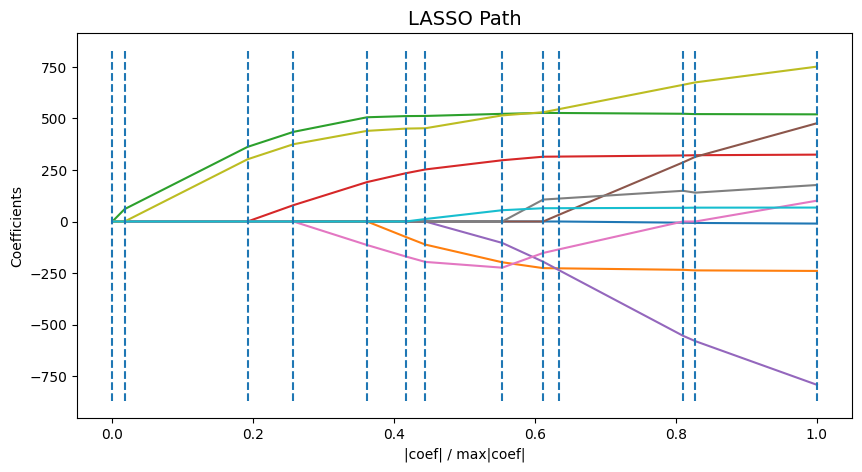

In [6]:
from sklearn import linear_model

diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

print("Computing regularization path using the LARS ...")
_, _, coefs = linear_model.lars_path(X, y, method='lasso', verbose=True)
xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]
fig = plt.figure()
plt.subplots(figsize=(10,5))
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path', fontsize=14)
plt.axis('tight')
#plt.savefig('5-lasso_path.png')